In [1]:
# Homework Session 5 - Statistical and Machine Learning Tools
# Support Vector Machines - Chapter 9
# Shabenoor Kamal

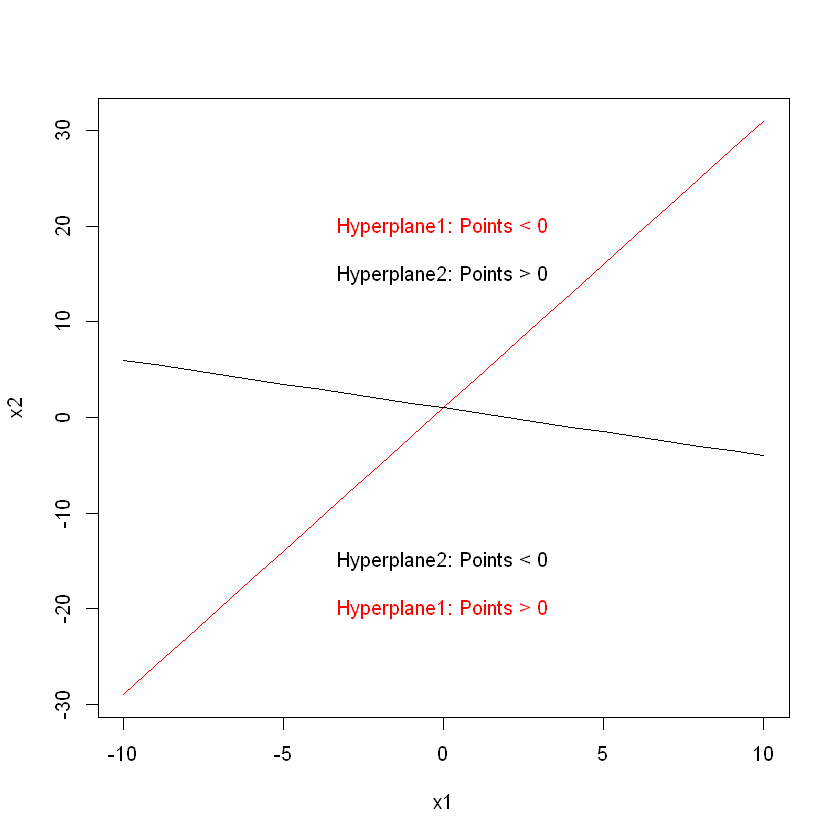

In [2]:
# Chapter 9 Exercise 1

# part a 
x1 = -10:10
x2 = 1 + 3 * x1
plot(x1, x2, type = "l", col = "red") # sketching the first hyperplane equation
text(c(0), c(-20), "Hyperplane1: Points > 0", col = "red") # points for which equation is > 0
text(c(0), c(20), "Hyperplane1: Points < 0", col = "red") # points for which equation is < 0

# part b
lines(x1, 1 - x1/2) # sketching the second hyperplane equation
text(c(0), c(15), "Hyperplane2: Points > 0") # points for which equation is > 0
text(c(0), c(-15), "Hyperplane2: Points < 0")  # points for which equation is < 0


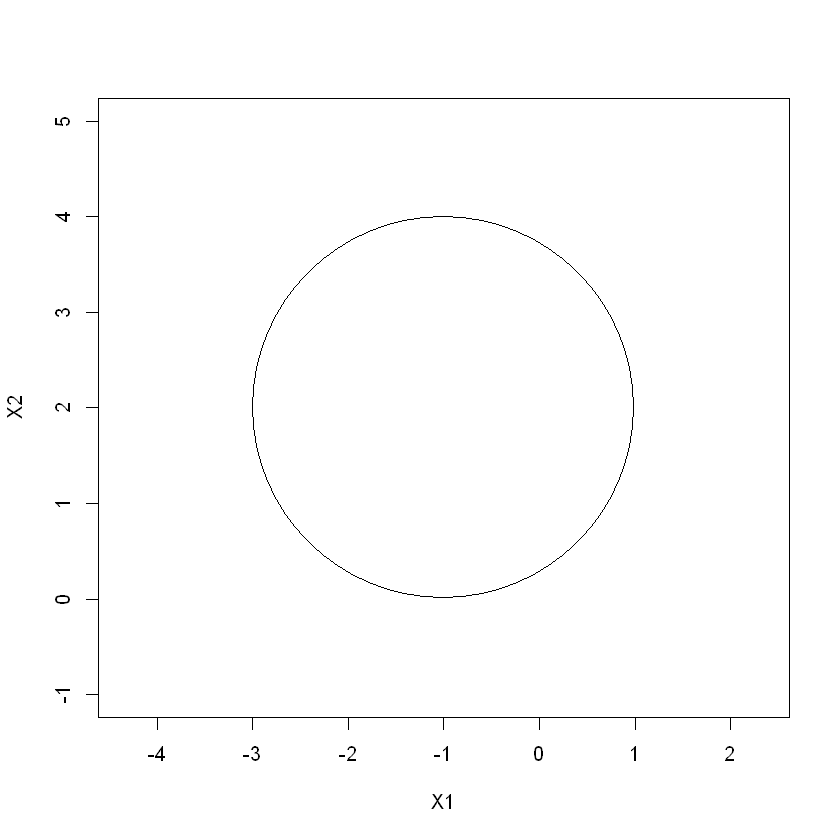

In [3]:
# Chapter 9 Exercise 2

#(1+X1)^2 + (2-X2)^2 = 4 is a circle with radius 2 and center (-1, 2).

# part a

radius = 2
plot(NA, NA, type="n", xlim=c(-4,2), ylim=c(-1,5), asp=1, xlab="X1", ylab="X2")
symbols(c(-1), c(2), circles=c(radius), add=TRUE, inches=FALSE) # plot the circle



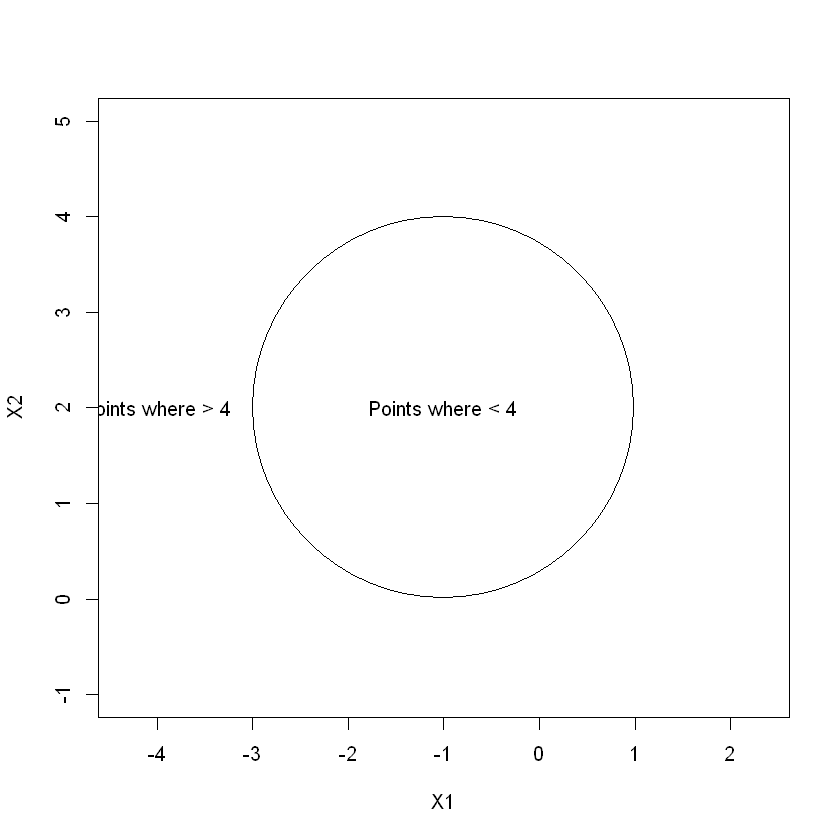

In [4]:
# part b

radius = 2

plot(NA, NA, type="n", xlim=c(-4,2), ylim=c(-1,5), asp=1, xlab="X1", ylab="X2")
symbols(c(-1), c(2), circles=c(radius), add=TRUE, inches=FALSE)
text(c(-1), c(2), "Points where < 4") # points for which curve is > 4
text(c(-4), c(2), "Points where > 4") # points for which curve is < 4


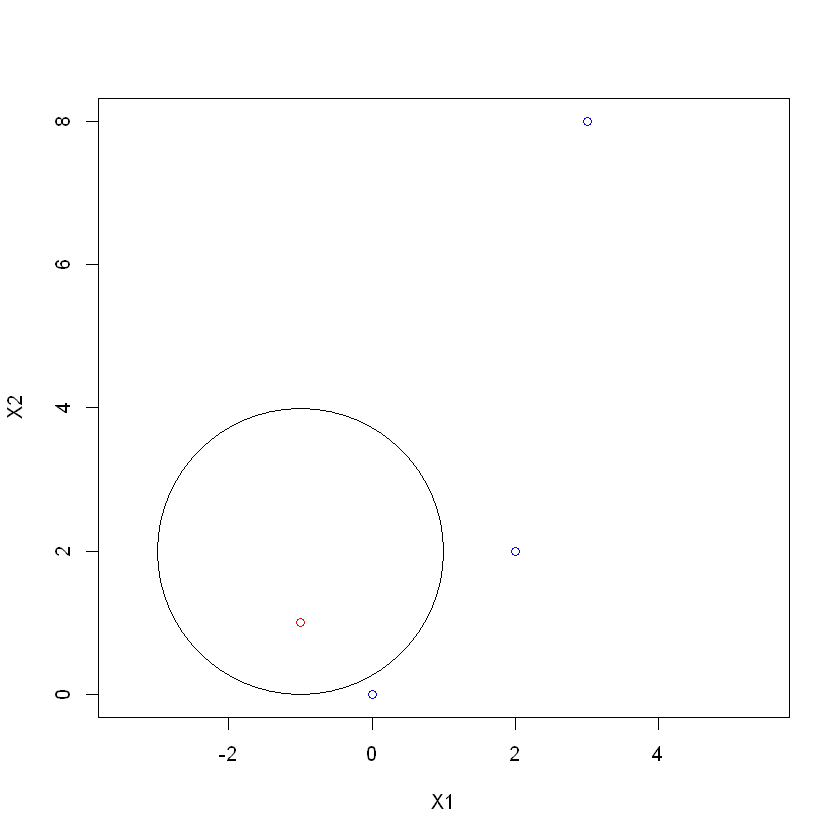

In [5]:
# part c
# Based on the last part we know that the boundary outside the circle is blue (points where equation is > 4)
# And inside the circle is red (points where equation is < 4)

radius = 2
# plot points and assign colors based on if they fall outside the circle (blue) or inside (red)
plot(c(0, -1, 2, 3), c(0, 1, 2, 8), col=c("blue", "red", "blue", "blue"),
     type="p", asp=1, xlab="X1", ylab="X2") 

symbols(c(-1), c(2), circles=c(radius), add=TRUE, inches=FALSE)



In [6]:
# part d
#The decision boundary is a sum of quadratic terms when expanded. It is not linear in terms of X1 and X2 
#But it is linear in terms of X1, X1^2, X2 and X2^2

(1+X1)^2+(2−X2)^2>4
1+2X1+X1^2+4−4X2+X2^2>4
5+2X1−4X2+X1^2+X2^2>4


ERROR: Error in parse(text = x, srcfile = src): <text>:6:4: unexpected symbol
5: (1+X1)^2+(2-X2)^2>4
6: 1+2X1
      ^


Warning message:
"package 'ISLR' was built under R version 3.6.2"Warning message:
"package 'e1071' was built under R version 3.6.2"

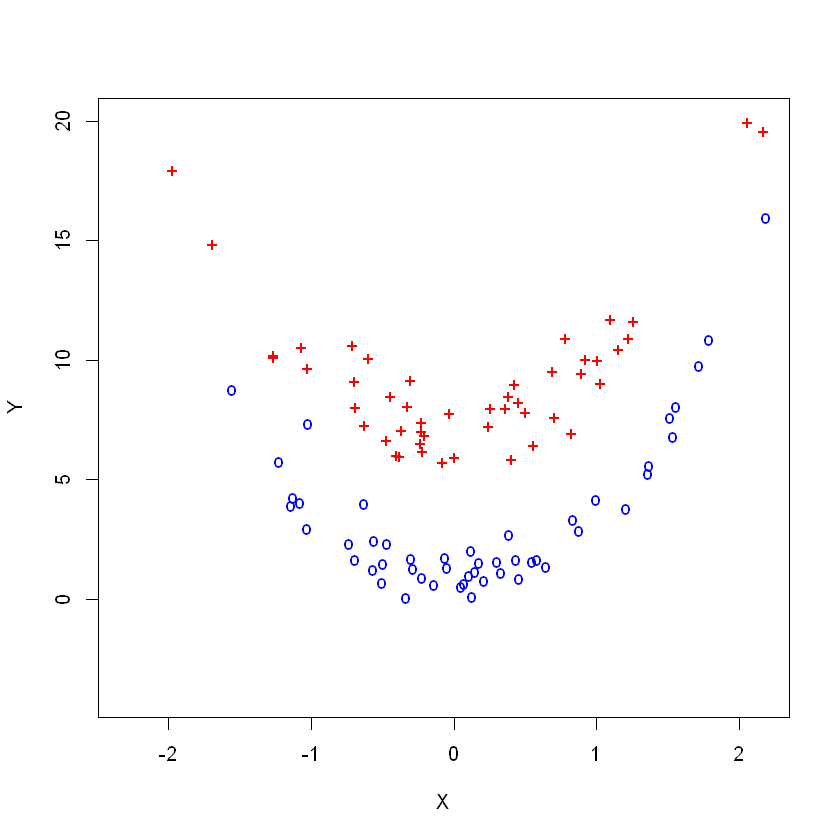

In [7]:
# Chapter 9 Exercise 4

library(ISLR)
library(e1071)

set.seed(123)

# create dataset with 100 observations and 2 features
# dataset lies along the parabola y=3∗x2+4 
# We then separate the two classes by translating them along Y-axis.
x = rnorm(100)
y = 3 * x^2 + 4 + rnorm(100)
train = sample(100, 50)
y[train] = y[train] + 3
y[-train] = y[-train] - 3

# Plot the two classes using different colors
plot(x[train], y[train], pch="+", lwd=4, col="red", ylim=c(-4, 20), xlab="X", ylab="Y")
points(x[-train], y[-train], pch="o", lwd=4, col="blue")

# the plot below shows that there is non-linear seperation


In [8]:
# Create the train and test dataframes by taking half each of positive and negative classes (from class1 and class2)
# creating a new z vector of 0 and 1 for classes.
set.seed(315)
z = rep(0, 100)
z[train] = 1
# Take 25 observations each from train and -train
final.train = c(sample(train, 25), sample(setdiff(1:100, train), 25))
data.train = data.frame(x=x[final.train], y=y[final.train], z=as.factor(z[final.train]))
data.test = data.frame(x=x[-final.train], y=y[-final.train], z=as.factor(z[-final.train]))


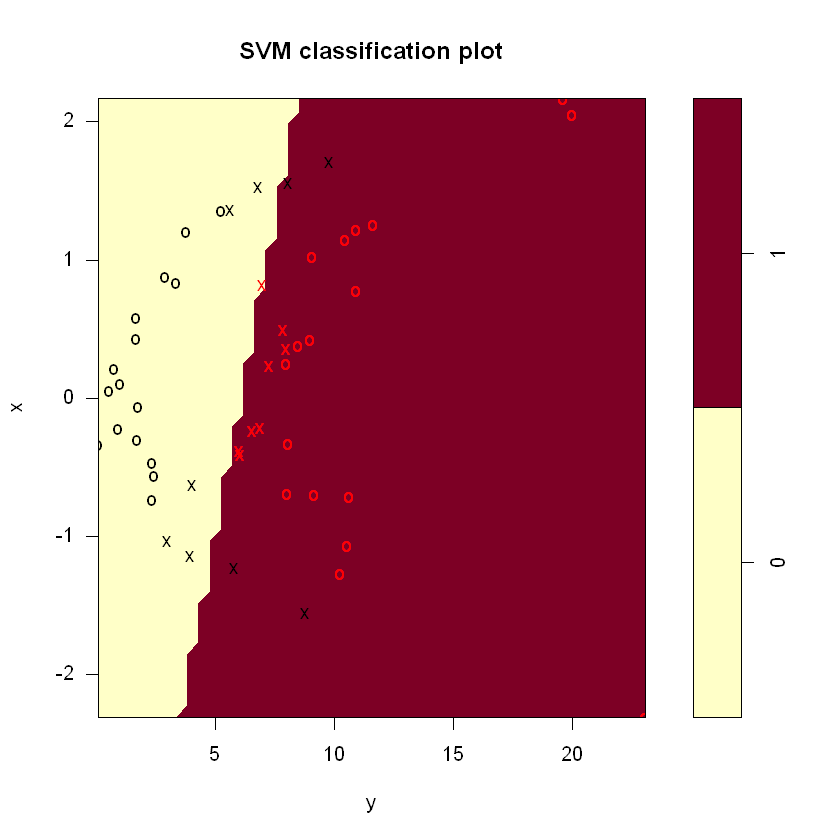

In [9]:
# First we train the support vector classifier (linear) on the training set

svm.linear = svm(z~., data=data.train, kernel="linear", cost=10)
plot(svm.linear, data.train)

In [10]:
table(z[final.train], predict(svm.linear, data.train))

# the classifier makes 4 classification errors on the train set

   
     0  1
  0 21  4
  1  0 25

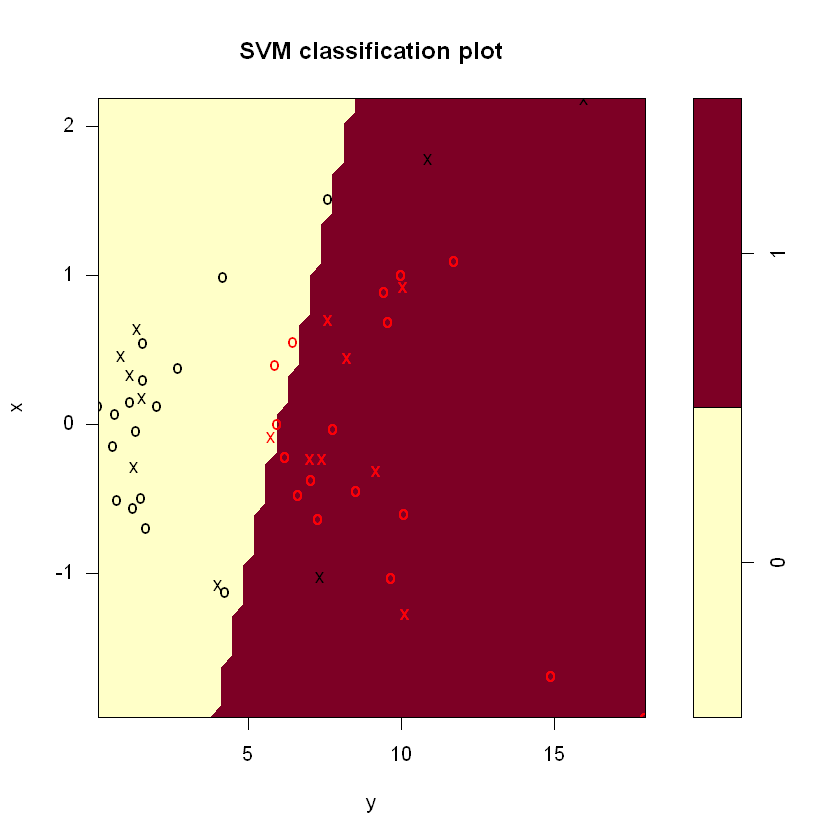

In [11]:
# test classifier on the test set

plot(svm.linear, data.test)

In [12]:
# test classifier on the test set

table(z[-final.train], predict(svm.linear, data.test))

# classifier makes 7 classification errors on the test set 

   
     0  1
  0 21  4
  1  3 22

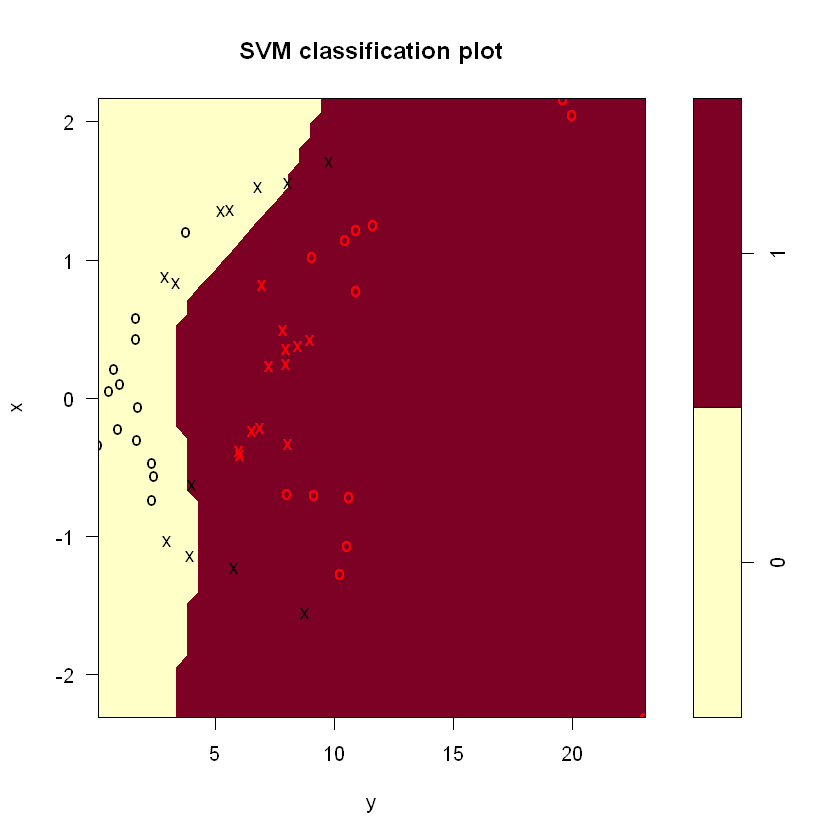

In [13]:
# Next, SVM with a polynomial kernal is trained on the train set

set.seed(123)
svm.poly = svm(z~., data=data.train, kernel="polynomial", cost=10)
plot(svm.poly, data.train)

In [14]:
table(z[final.train], predict(svm.poly, data.train))

# SVM with polynomial kernal makes 5 classification errors on the train set

   
     0  1
  0 20  5
  1  0 25

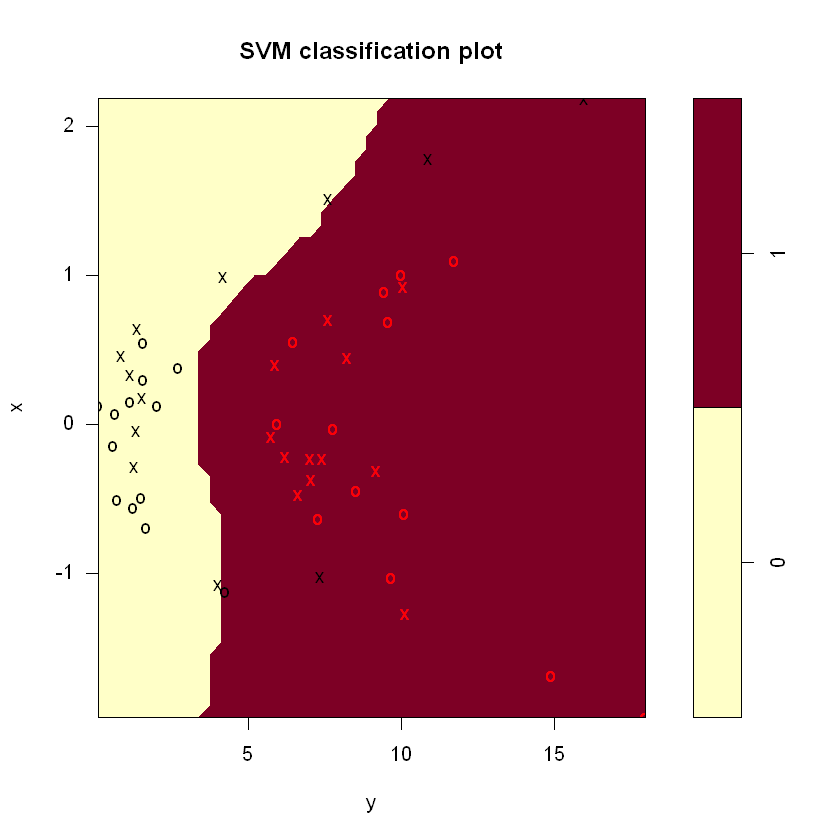

In [15]:
# test SVM with polynomial kernal on the test set

plot(svm.poly, data.test)

In [16]:
table(z[-final.train], predict(svm.poly, data.test))

# SVM with polynomial kernal makes 5 classification errors on the test set

   
     0  1
  0 20  5
  1  0 25

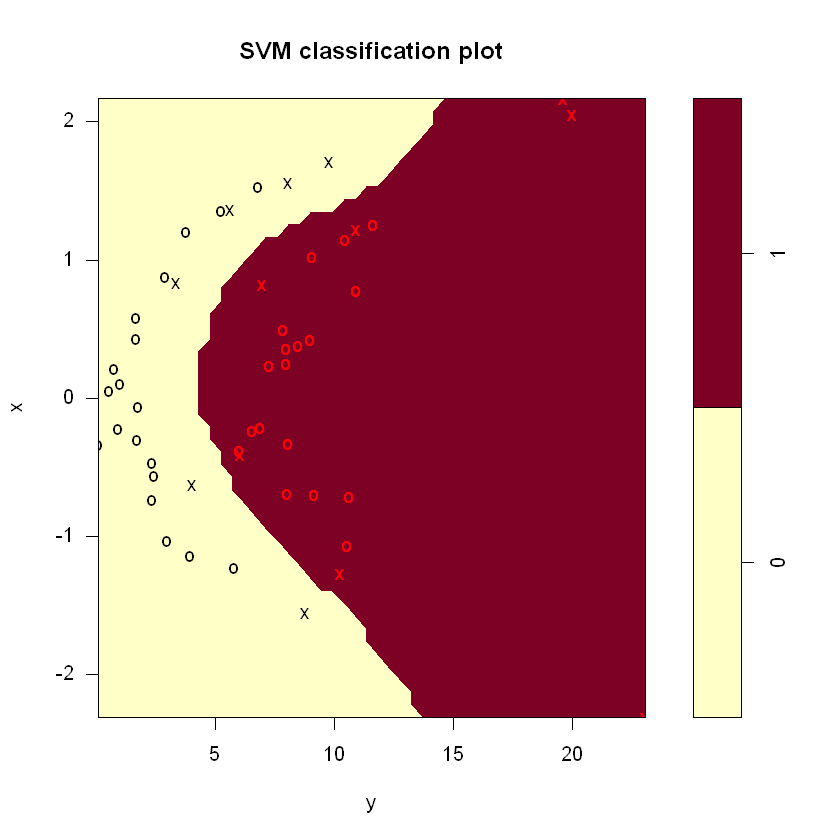

In [17]:
# Next, SVM with a radial kernal is trained on the train set

set.seed(123)
svm.radial = svm(z~., data=data.train, kernel="radial", gamma=1, cost=10)
plot(svm.radial, data.train)

In [18]:
table(z[final.train], predict(svm.radial, data.train))

# SVM with radial kernal makes 0 classification errors on the train set

   
     0  1
  0 25  0
  1  0 25

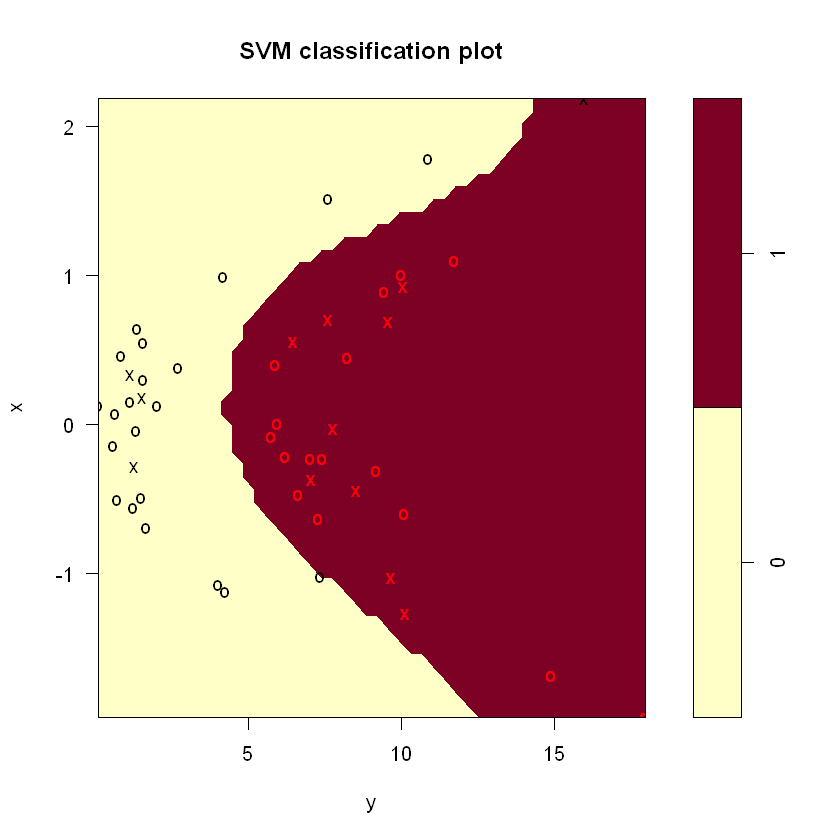

In [19]:
# test SVM with radial kernal on the test set

plot(svm.radial, data.test)

In [20]:
table(z[-final.train], predict(svm.radial, data.test))

# SVM with radial kernal makes 2 classification errors on the test set

   
     0  1
  0 23  2
  1  0 25

In [21]:
# the above results show us that SVM with radial kernal makes 2 classification errors on the test set
# SVM with polynomial kernal makes 5 classification errors on the test set
# support vector classifier (linear kernal) makes 7 classification errors on the test set

# therefore SVM with radial kernal performs best on the test data followed by SVM with polynomial kernal

In [22]:
# Chapter 9 Exercise 7

# part a 
# create binary variable: cars with gas mileage > median = 1, < median = 0

gas.med = median(Auto$mpg)
new.var = ifelse(Auto$mpg > gas.med, 1, 0)
Auto$mpglevel = as.factor(new.var)

In [23]:
# part b
# use support vector classifier to predict if car gets high or low gas mileage

set.seed(123)
tune.output = tune(svm, mpglevel ~ ., data = Auto, kernel = "linear", ranges = list(cost = c(0.01, 
    0.1, 1, 5, 10, 100))) #check with various values of cost
summary(tune.output)

# the results show that error is minimized with cost=1


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.01025641 

- Detailed performance results:
   cost      error dispersion
1 1e-02 0.07634615 0.03928191
2 1e-01 0.04333333 0.03191738
3 1e+00 0.01025641 0.01792836
4 5e+00 0.01538462 0.01792836
5 1e+01 0.01788462 0.01727588
6 1e+02 0.03320513 0.02720447


In [24]:
# part c
# use SVM with polynomial kernal to predict if car gets high or low gas mileage

set.seed(123)
tune.out = tune(svm, mpglevel ~ ., data = Auto, kernel = "polynomial", ranges = list(cost = c(0.1, 
    1, 5, 10), degree = c(2, 3, 4)))
summary(tune.out)

# the results show that error is minimized with cost=10 and degree = 2


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
   10      2

- best performance: 0.5714744 

- Detailed performance results:
   cost degree     error dispersion
1   0.1      2 0.5817308 0.04740051
2   1.0      2 0.5817308 0.04740051
3   5.0      2 0.5817308 0.04740051
4  10.0      2 0.5714744 0.04575370
5   0.1      3 0.5817308 0.04740051
6   1.0      3 0.5817308 0.04740051
7   5.0      3 0.5817308 0.04740051
8  10.0      3 0.5817308 0.04740051
9   0.1      4 0.5817308 0.04740051
10  1.0      4 0.5817308 0.04740051
11  5.0      4 0.5817308 0.04740051
12 10.0      4 0.5817308 0.04740051


In [25]:
# use SVM with radial kernal to predict if car gets high or low gas mileage

set.seed(123)
tune.out = tune(svm, mpglevel ~ ., data = Auto, kernel = "radial", ranges = list(cost = c(0.1, 
    1, 5, 10), gamma = c(0.01, 0.1, 1, 5, 10, 100)))
summary(tune.out)

# the results show that error is minimized with cost=10 and gamma=0.01


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
   10  0.01

- best performance: 0.02032051 

- Detailed performance results:
   cost gamma      error dispersion
1   0.1 1e-02 0.08916667 0.04345384
2   1.0 1e-02 0.07378205 0.04185248
3   5.0 1e-02 0.04589744 0.03136327
4  10.0 1e-02 0.02032051 0.02305327
5   0.1 1e-01 0.07634615 0.03928191
6   1.0 1e-01 0.05852564 0.03960325
7   5.0 1e-01 0.03057692 0.02611396
8  10.0 1e-01 0.03314103 0.02942215
9   0.1 1e+00 0.58173077 0.04740051
10  1.0 1e+00 0.05865385 0.04942437
11  5.0 1e+00 0.05608974 0.04595880
12 10.0 1e+00 0.05608974 0.04595880
13  0.1 5e+00 0.58173077 0.04740051
14  1.0 5e+00 0.51544872 0.06790600
15  5.0 5e+00 0.51544872 0.06790600
16 10.0 5e+00 0.51544872 0.06790600
17  0.1 1e+01 0.58173077 0.04740051
18  1.0 1e+01 0.54602564 0.06355090
19  5.0 1e+01 0.54102564 0.06959451
20 10.0 1e+01 0.54102564 0.06959451
21  0.1 1e+02 0.58173077 0.04740051
22  1.0 1e+02 0.58173077

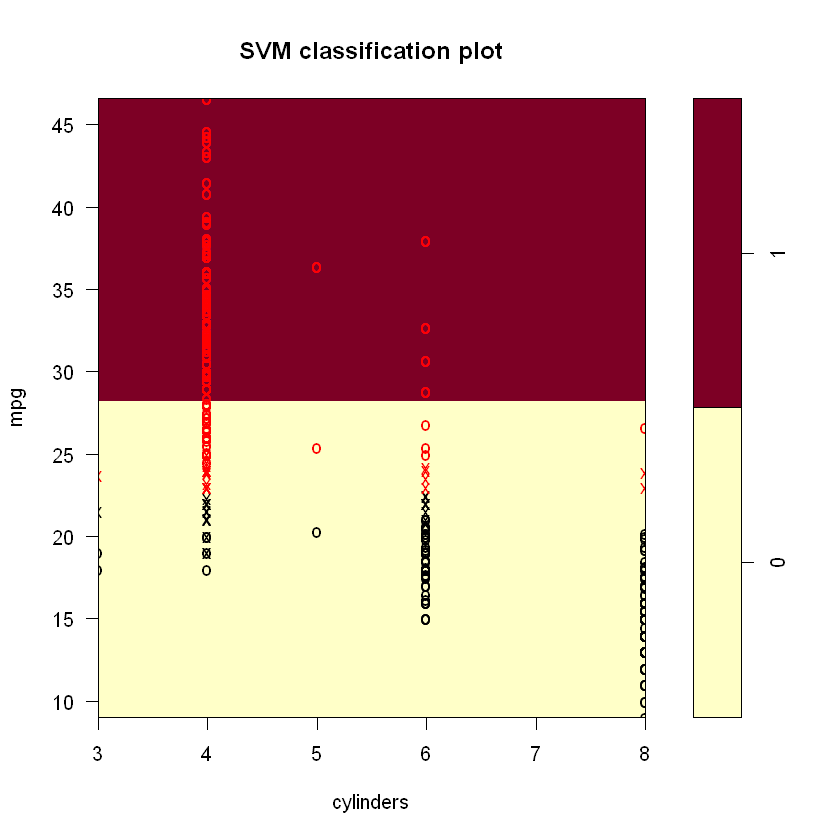

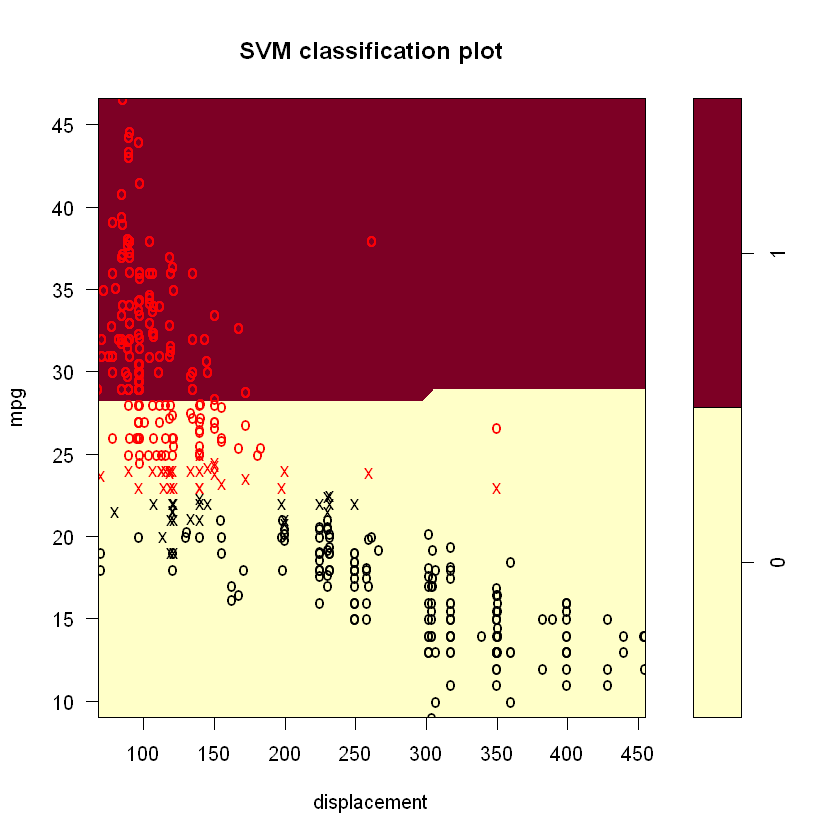

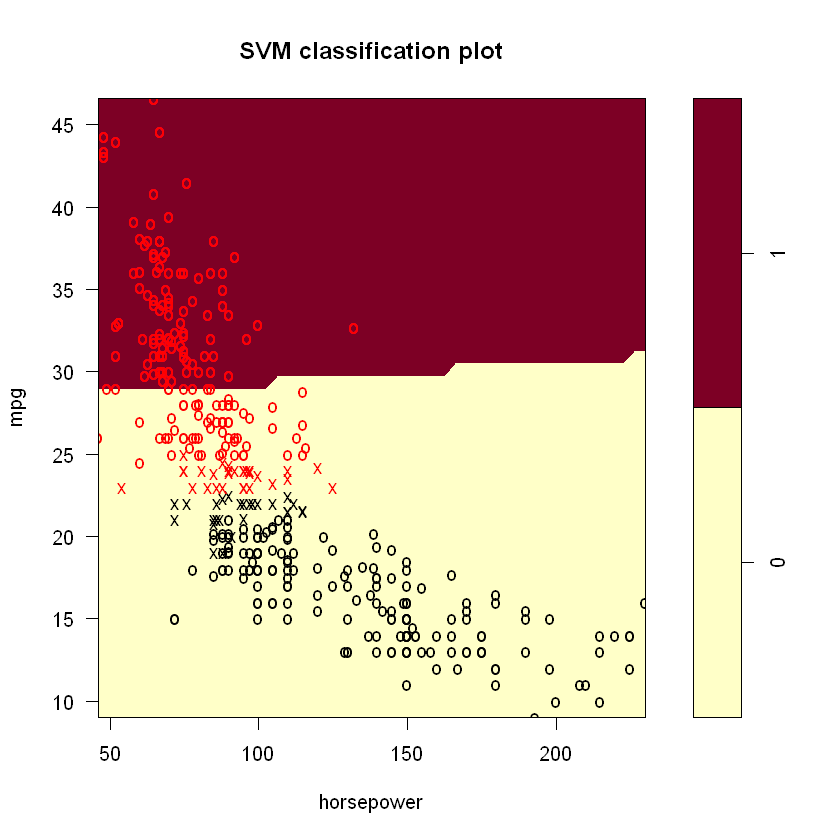

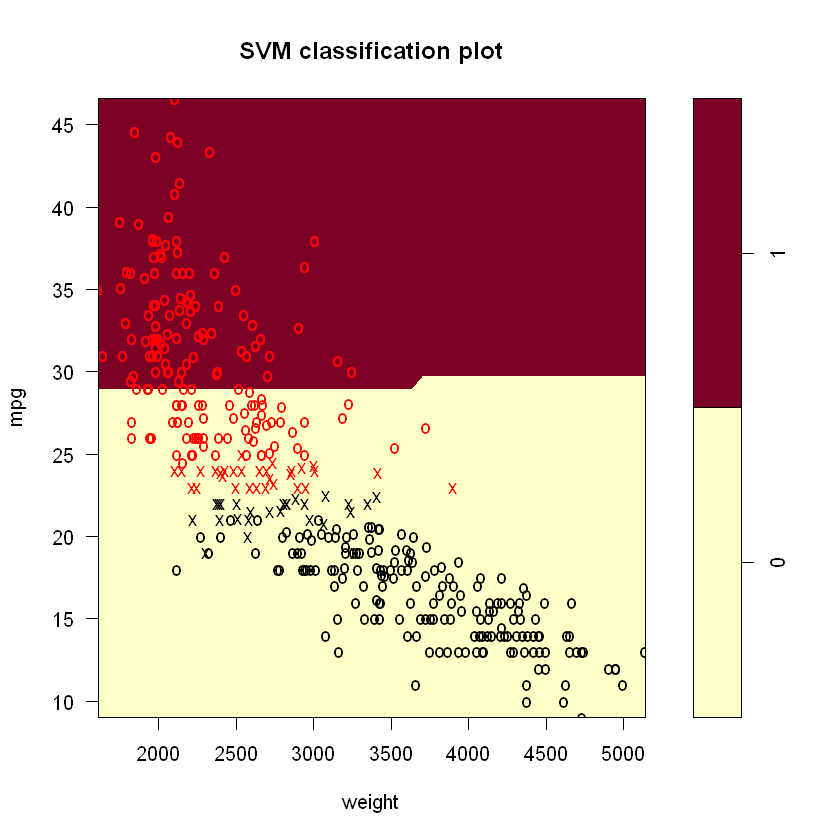

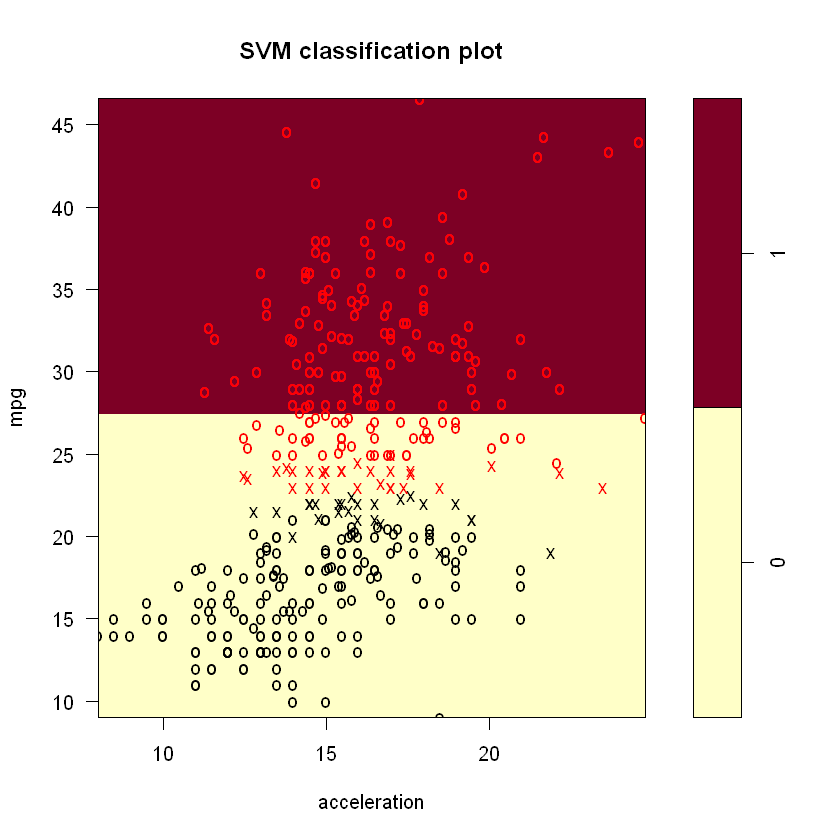

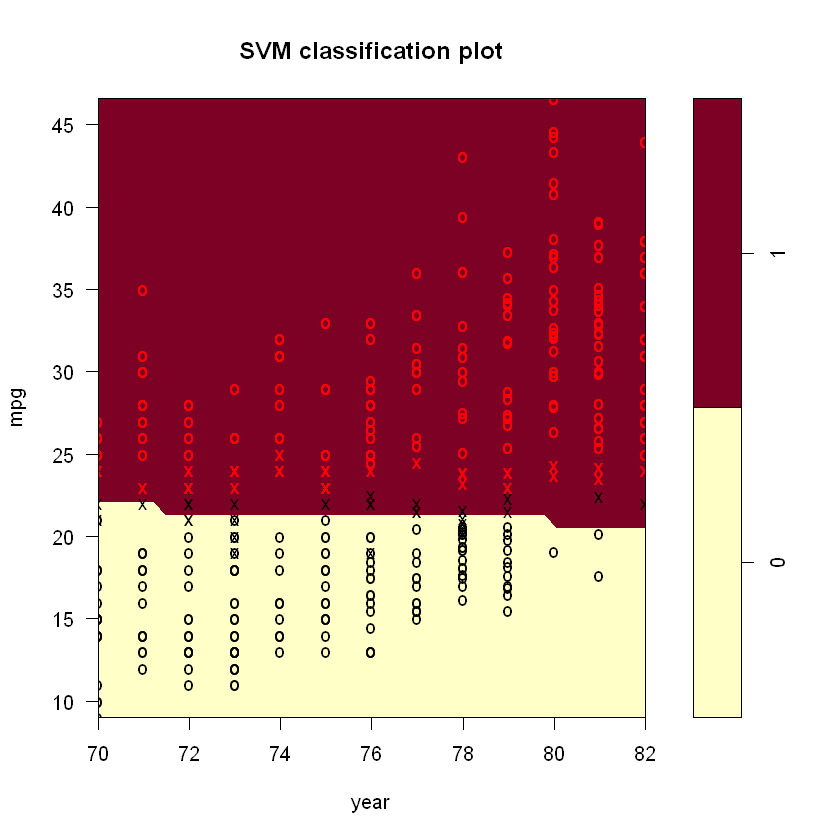

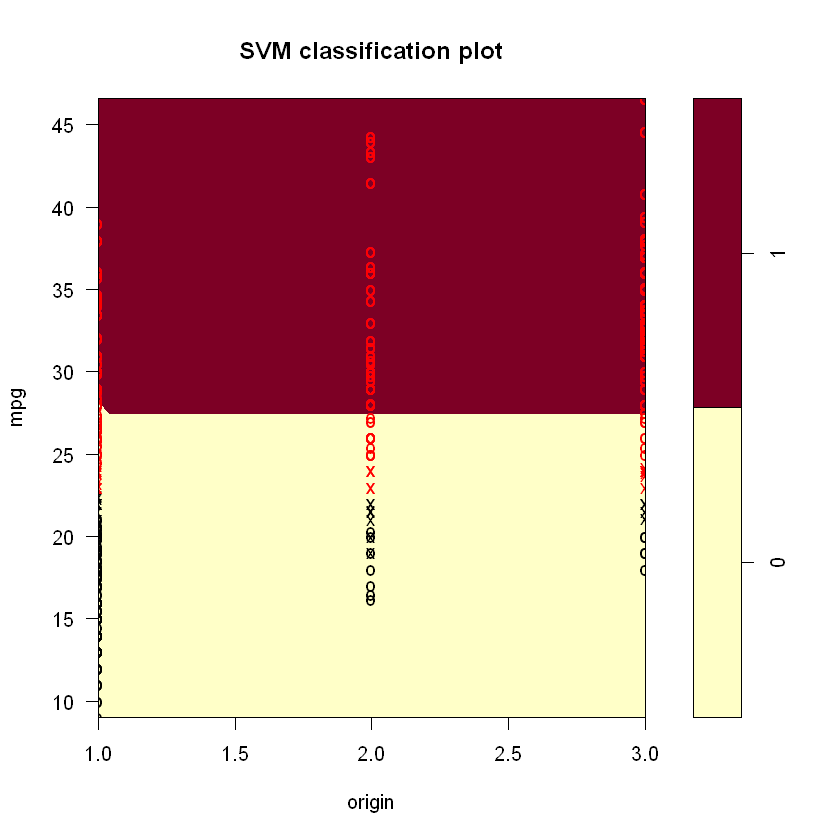

In [27]:
# part d

# create plots to show results for SVM with linear kernal, polynomial kernal and radial kernal
# use the identified best parameters for which error is minimized in each

svm.linear = svm(mpglevel ~ ., data = Auto, kernel = "linear", cost = 1)
svm.poly = svm(mpglevel ~ ., data = Auto, kernel = "polynomial", cost = 10, degree = 2)
svm.radial = svm(mpglevel ~ ., data = Auto, kernel = "radial", cost = 10, gamma = 0.01)
plotpairs = function(fit) {
    for (name in names(Auto)[!(names(Auto) %in% c("mpg", "mpglevel", "name"))]) {
        plot(fit, Auto, as.formula(paste("mpg~", name, sep = "")))
    }
}
# for the linear kernal
plotpairs(svm.linear)

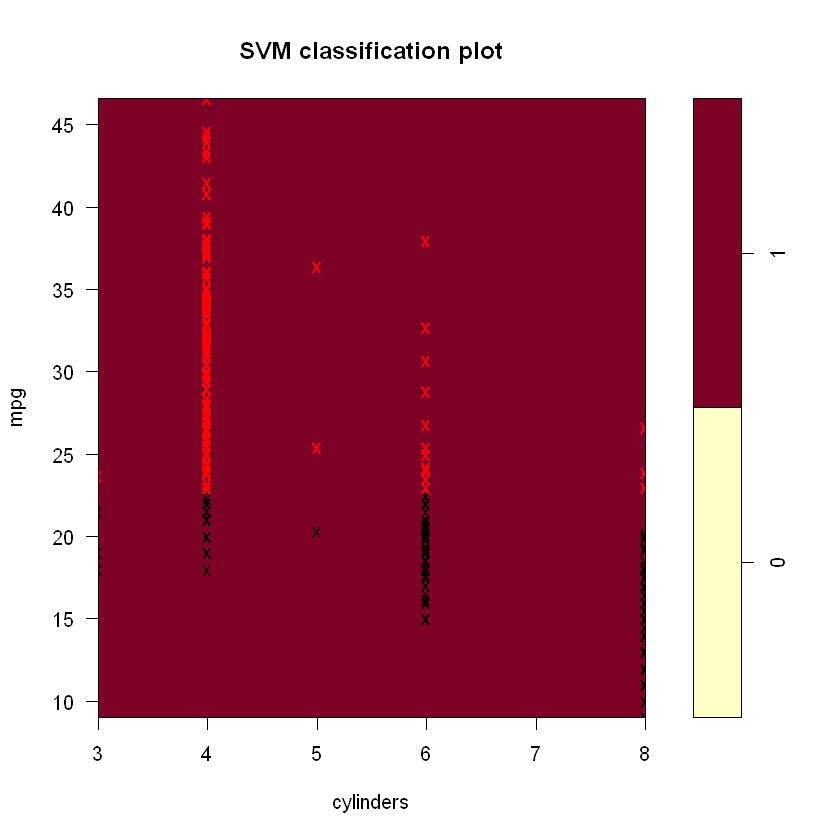

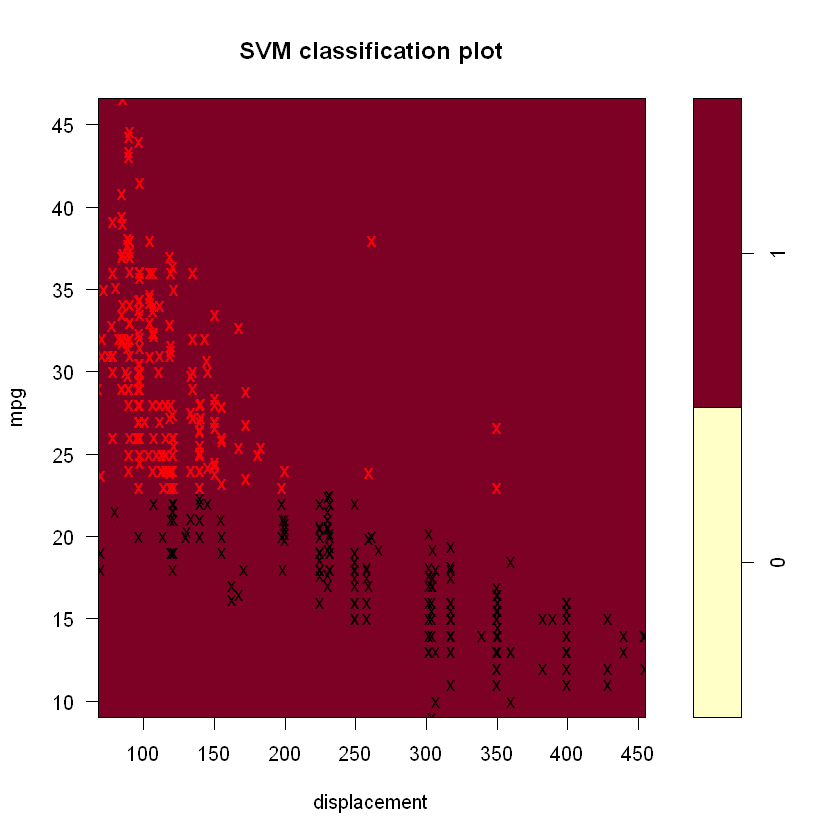

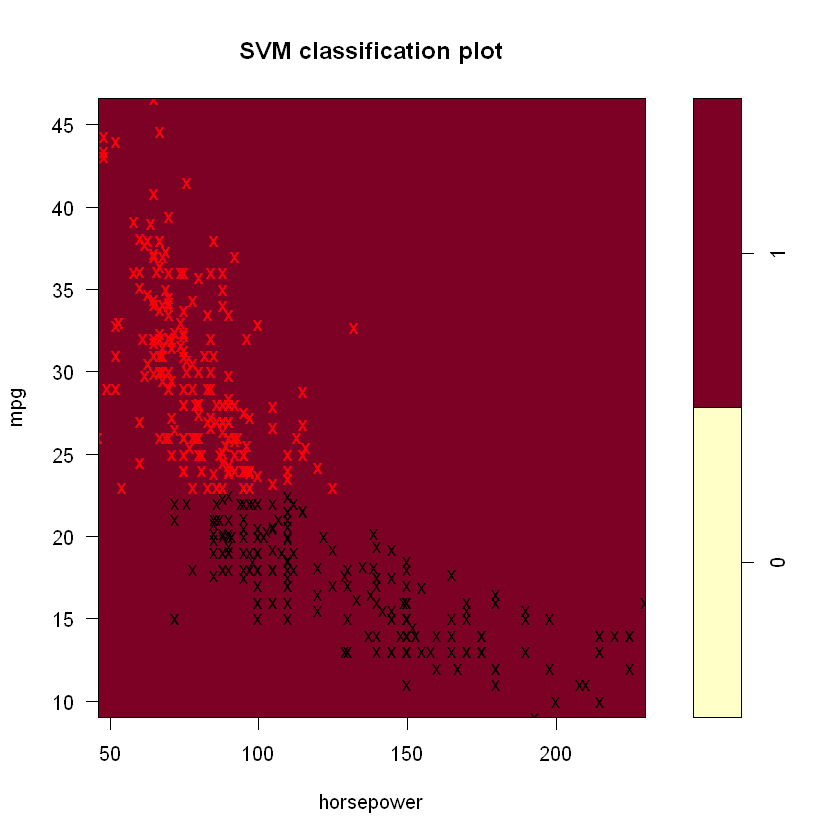

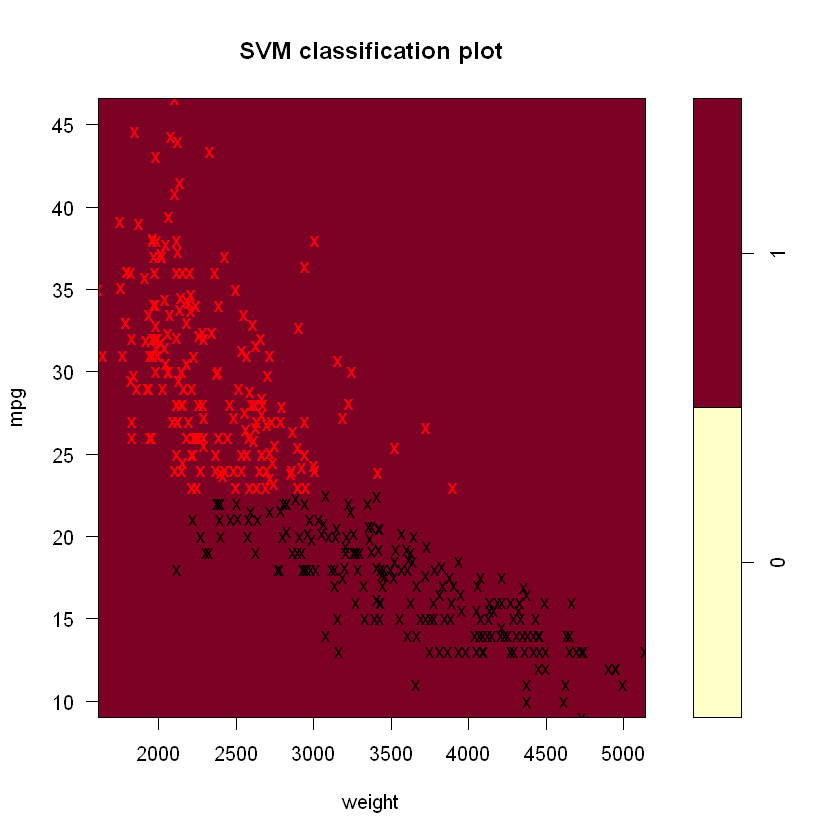

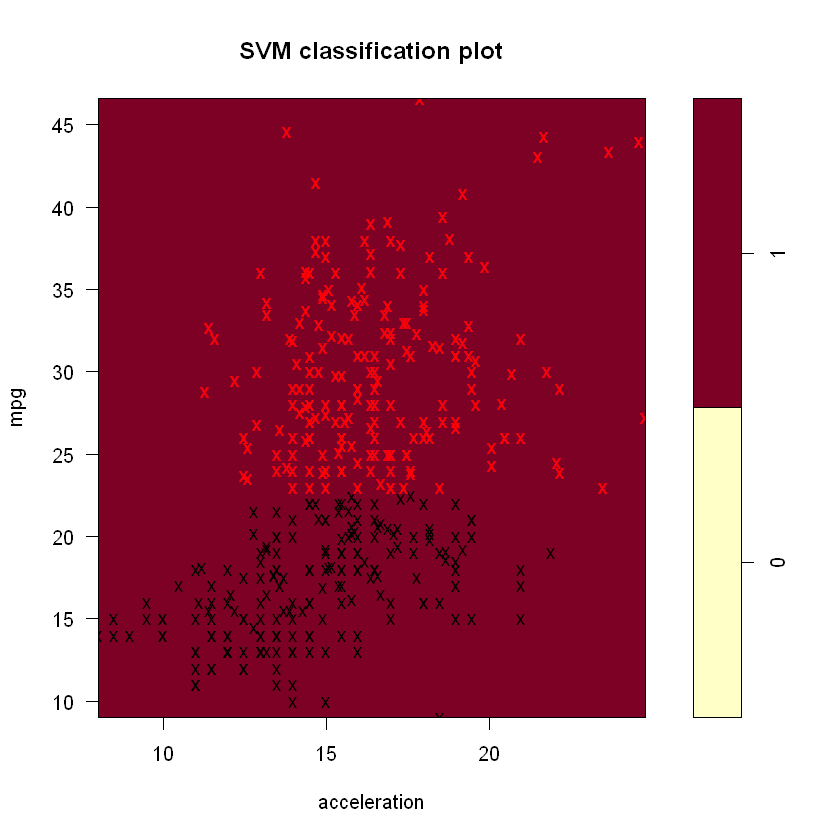

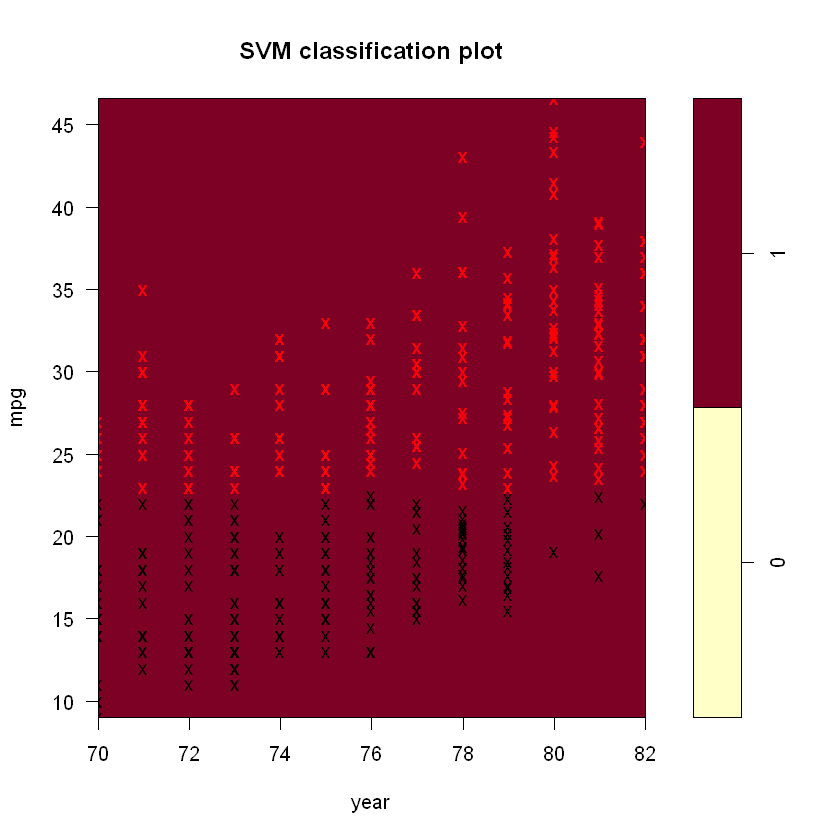

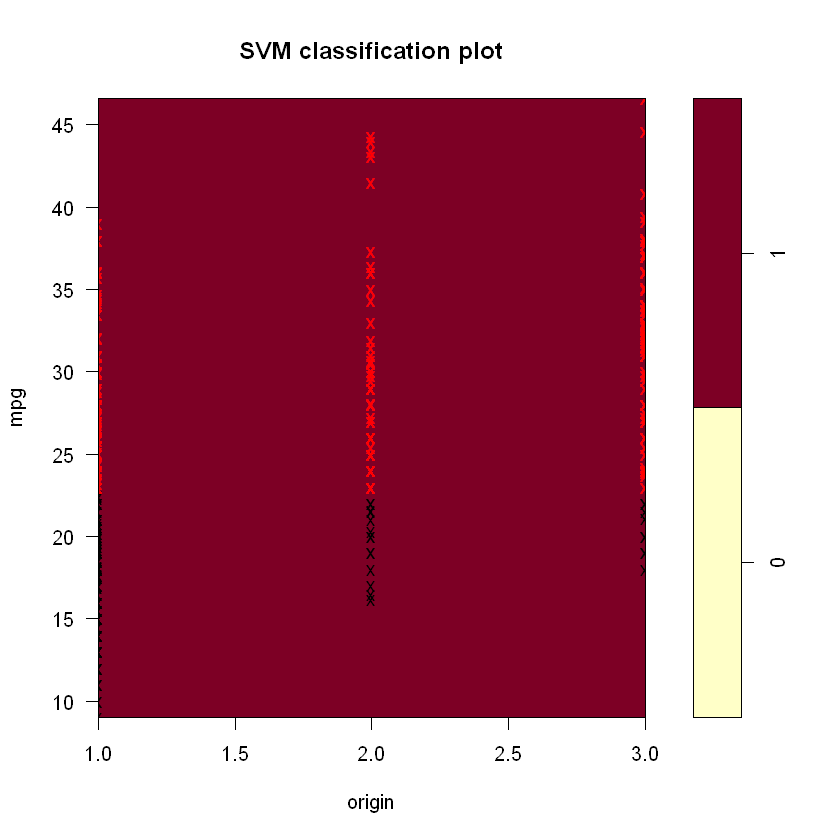

In [28]:
# for polynomial kernal
plotpairs(svm.poly)

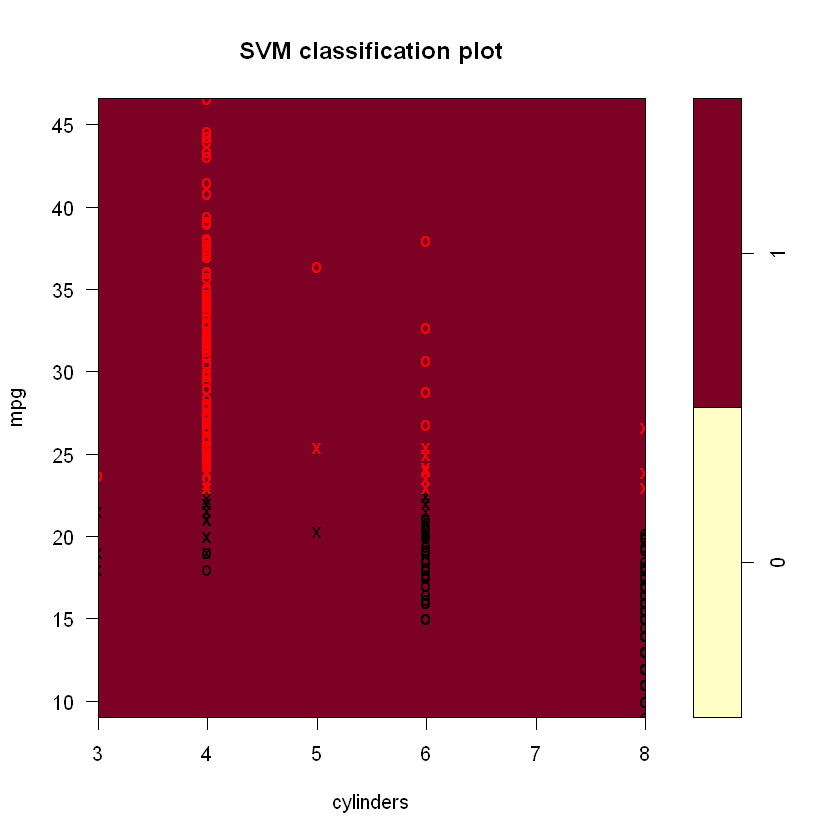

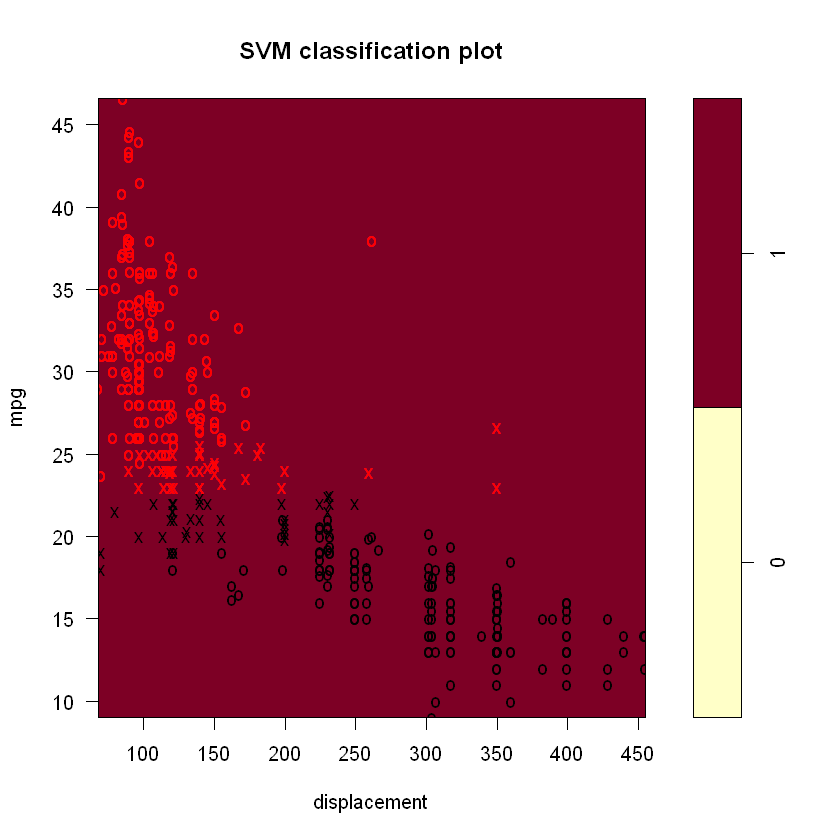

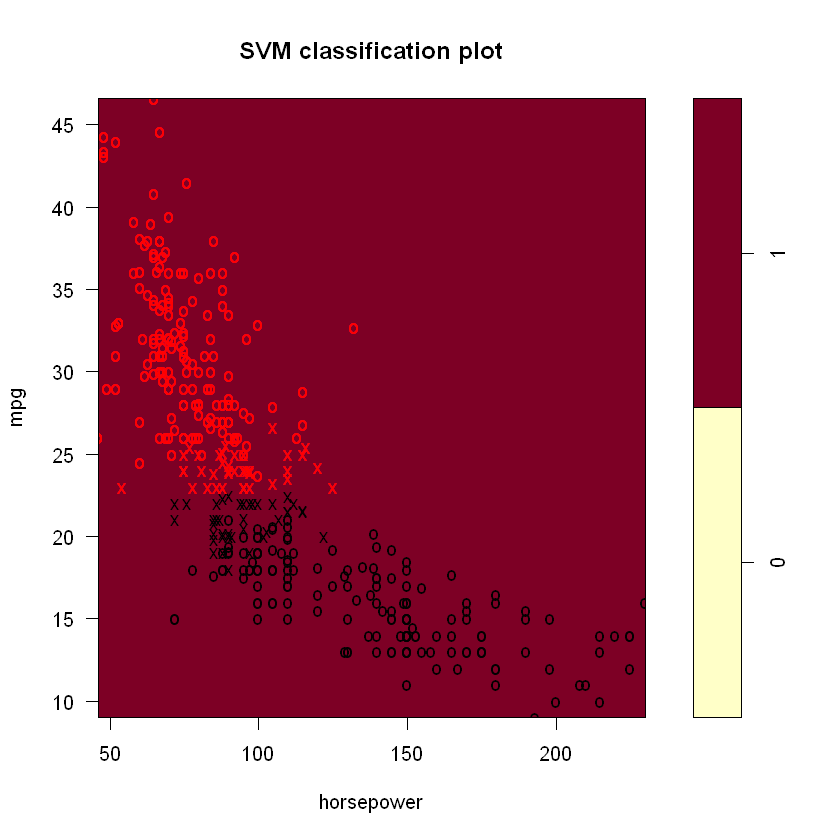

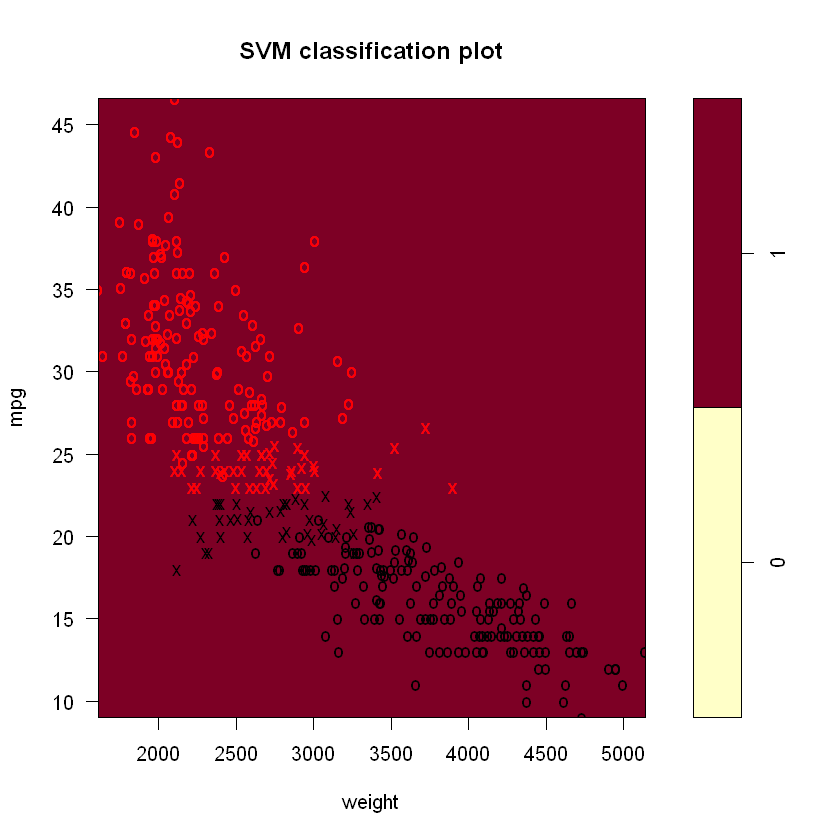

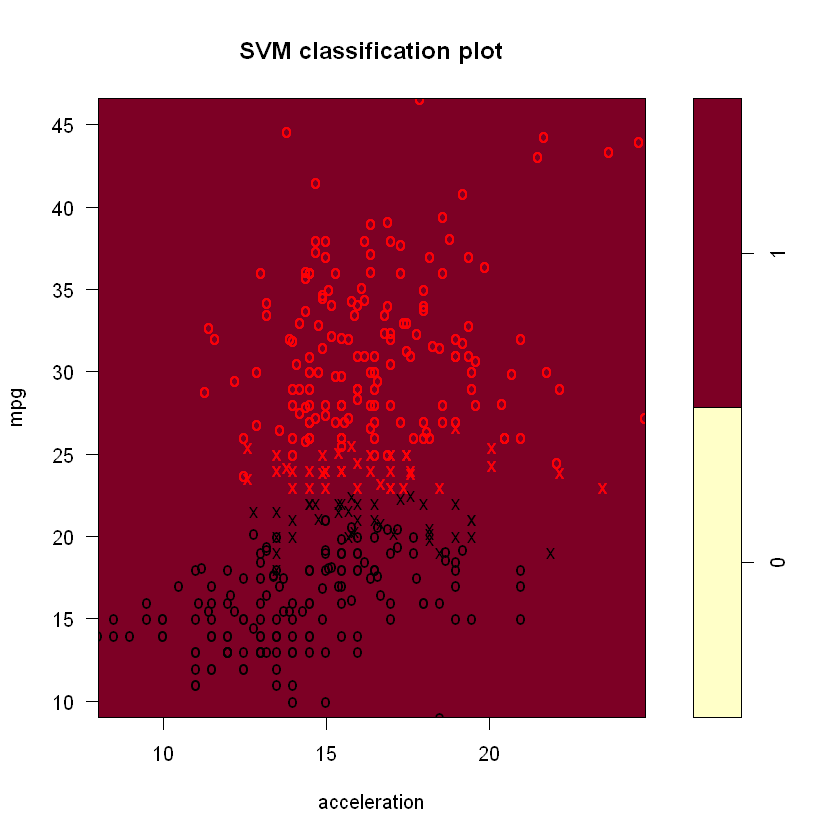

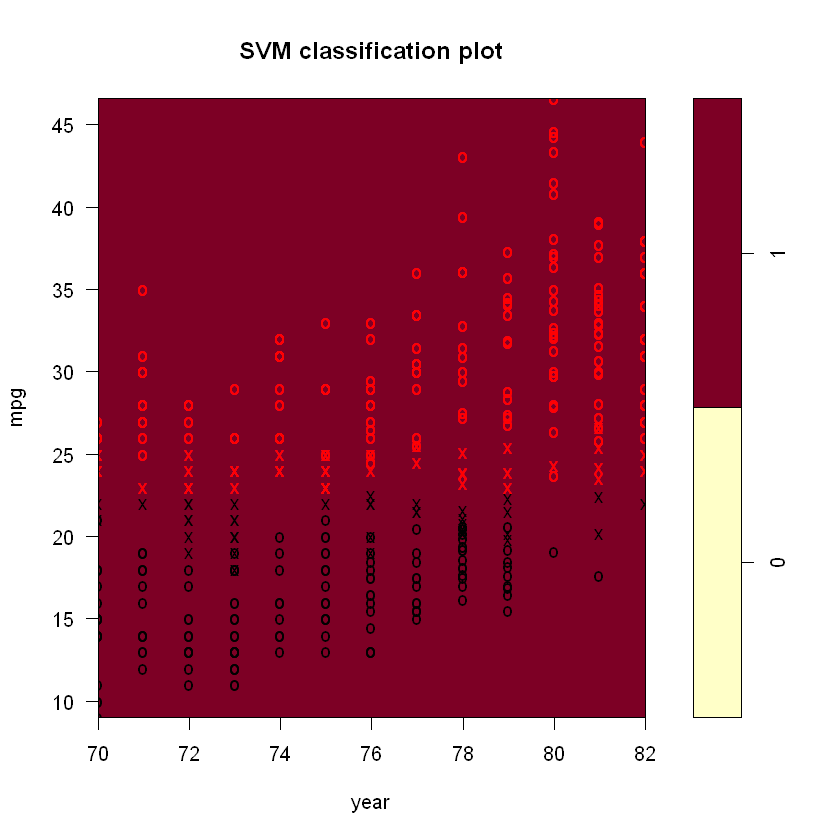

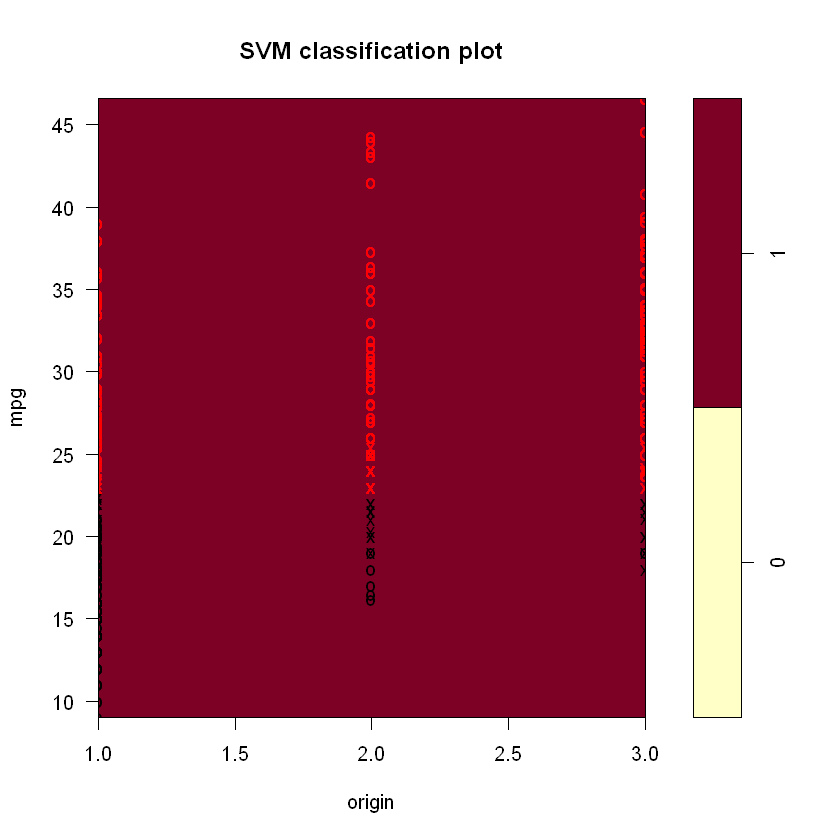

In [29]:
# for radial kernal
plotpairs(svm.radial)

In [30]:
# Chapter 9 Exercise 8

# part a - create a training and test set
set.seed(123)
train = sample(dim(OJ)[1], 800)
OJ.train = OJ[train, ]
OJ.test = OJ[-train, ]

In [31]:
# part b

# fit support vector classifier to the training data 
svm.linear = svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = 0.01)
summary(svm.linear)

# the support vector classifier creates 442 support vector for the 800 observations in the training data 
# Out of these 220 belong to level CH and 222 belong to level MM


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  442

 ( 220 222 )


Number of Classes:  2 

Levels: 
 CH MM




In [35]:
# part c

# training error rate 
train.pred = predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

(61 + 71)/(61 + 71 + 426 + 242)

# training error rate is 16.5%

# test error rate
test.pred = predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

(21 + 27)/(21 + 27 + 77 + 145)

# test error rate is 17.7%

    train.pred
      CH  MM
  CH 426  61
  MM  71 242

[1] 0.165

    test.pred
      CH  MM
  CH 145  21
  MM  27  77

[1] 0.1777778

In [40]:
# part d 

# use tune function to select optimal cost

set.seed(123)
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "linear", ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(tune.out)

# the results from the tuning show that the optimal cost is 3.16


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 3.162278

- best performance: 0.16375 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.17375 0.04910660
2   0.01778279 0.17250 0.04816061
3   0.03162278 0.17125 0.04678927
4   0.05623413 0.17250 0.04594683
5   0.10000000 0.17500 0.04823265
6   0.17782794 0.17625 0.04427267
7   0.31622777 0.17125 0.04084609
8   0.56234133 0.17125 0.04168749
9   1.00000000 0.16875 0.03963812
10  1.77827941 0.16875 0.04135299
11  3.16227766 0.16375 0.04185375
12  5.62341325 0.17125 0.03998698
13 10.00000000 0.17000 0.04005205


In [44]:
# part e

# compute train and test error rates using cost = 3.16

# first train 
svm.linear = svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = tune.out$best.parameters$cost)
train.pred = predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

(60+69)/(60 + 69 + 427 + 244)

# The train error rate is 16% - decreases sightly from earlier 16.5%

# next test on test set
test.pred = predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)


(17 + 25)/(17 + 25 + 79 + 149)

# The test error rate is 15.5% - decreases from earlier 17.7%

    train.pred
      CH  MM
  CH 427  60
  MM  69 244

[1] 0.16125

    test.pred
      CH  MM
  CH 149  17
  MM  25  79

[1] 0.1555556

In [46]:
# part f 

# repeat above steps using SVM with a radial kernal

# fit SVM with radial kernal to train data
set.seed(123)
svm.radial = svm(Purchase ~ ., data = OJ.train, kernel = "radial")
summary(svm.radial)

# the SVM with radial kernal creates 367 support vectors for the 800 observations in the training data 
# Out of these 181 belong to level CH and 186 belong to level MM


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  367

 ( 181 186 )


Number of Classes:  2 

Levels: 
 CH MM




In [51]:
# get the training error 
train.pred = predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

(41 + 70)/(41 + 70 + 243 + 446)

# training error rate of 13.9%

# get the test error rate 
test.pred = predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

(17 + 34)/(17 + 34 + 70 + 149)

# test error rate of 18.9%

    train.pred
      CH  MM
  CH 446  41
  MM  70 243

[1] 0.13875

    test.pred
      CH  MM
  CH 149  17
  MM  34  70

[1] 0.1888889

In [54]:
# find the optimal cost - SVM with radial kernal
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "radial", ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(tune.out)

# the results from the tuning show that the optimal cost is 1.78


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 1.778279

- best performance: 0.165 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.39125 0.03634805
2   0.01778279 0.39125 0.03634805
3   0.03162278 0.36875 0.04938862
4   0.05623413 0.20500 0.06324555
5   0.10000000 0.17750 0.05163978
6   0.17782794 0.17625 0.04143687
7   0.31622777 0.16875 0.04093101
8   0.56234133 0.17250 0.04073969
9   1.00000000 0.17000 0.03395258
10  1.77827941 0.16500 0.03670453
11  3.16227766 0.16625 0.04251225
12  5.62341325 0.17000 0.04794383
13 10.00000000 0.17250 0.04993051


In [58]:
# recalculate training and test error rate using the optimal cost = 1.78
svm.radial = svm(Purchase ~ ., data = OJ.train, kernel = "radial", cost = tune.out$best.parameters$cost)
train.pred = predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

(42 + 70)/(42 +70 + 243 + 445)

# New training error rate of 14% - slightly worse than the earlier train error rate of 13.9%

test.pred = predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

(18 + 34)/(18 + 34 + 70 + 148)

# New test error rate of 19% - slightly worse than the earlier test error rate of 18.9%

    train.pred
      CH  MM
  CH 445  42
  MM  70 243

[1] 0.14

    test.pred
      CH  MM
  CH 148  18
  MM  34  70

[1] 0.1925926

In [59]:
# part g 

# repeat all above steps for SVM with polynomial kernal

svm.poly = svm(Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2)
summary(svm.poly)

# the SVM with polynomial kernal creates 445 support vectors for the 800 observations in the training data 
# Out of these 219 belong to level CH and 226 belong to level MM


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  445

 ( 219 226 )


Number of Classes:  2 

Levels: 
 CH MM




In [63]:
# get the train and test error rates 
# train error
train.pred = predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

(33 + 105)/(33 + 105 + 208 + 454)

# Training error rate of 17.3%

test.pred = predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

(13 + 47)/(13 + 47 + 57 + 153)

# test error rate of 22.2%

    train.pred
      CH  MM
  CH 454  33
  MM 105 208

[1] 0.1725

    test.pred
      CH  MM
  CH 153  13
  MM  47  57

[1] 0.2222222

In [64]:
# find the optimal cost for SVM with polynomial kernal
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2, 
    ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune.out)

# based on tuning cost = 10 minimizes the error


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
   10

- best performance: 0.1625 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.39000 0.07355081
2   0.01778279 0.36750 0.06433420
3   0.03162278 0.35875 0.06509875
4   0.05623413 0.32625 0.06050999
5   0.10000000 0.31250 0.03864008
6   0.17782794 0.23875 0.03793727
7   0.31622777 0.20500 0.04048319
8   0.56234133 0.19750 0.03425801
9   1.00000000 0.19375 0.03448530
10  1.77827941 0.17875 0.03729108
11  3.16227766 0.18000 0.04005205
12  5.62341325 0.17125 0.03120831
13 10.00000000 0.16250 0.04208127


In [68]:
# recalculate train and test error rates based on optimal cost = 10
# train error 
svm.poly = svm(Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2, cost = tune.out$best.parameters$cost)
train.pred = predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

(36 + 79)/(36 + 79 + 234 + 451)

# training error rate of 14.4% - improvement from earlier 17.3%

# test error
test.pred = predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

(16 + 39)/(16 + 39 + 65 + 150)

# test error rate of 20.4% - improvement from earlier 22.2%

    train.pred
      CH  MM
  CH 451  36
  MM  79 234

[1] 0.14375

    test.pred
      CH  MM
  CH 150  16
  MM  39  65

[1] 0.2037037

In [ ]:
# Based on the above results the support vector classifier (linear kernal) gives the best results on this data
# produces minimum misclassification error (train error rate and test error rate) on both train and test data